In [592]:
import numpy as np 
import pandas as pd

In [594]:
df = pd.read_csv('spam.csv',encoding='latin-1')

In [596]:
df.sample(100)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4511,ham,Now project pa. After that only i can come.,NaN,NaN,NaN
1576,ham,No. To be nosy I guess. Idk am I over reacting...,NaN,NaN,NaN
2188,spam,FREE camera phones with linerental from 4.49/m...,NaN,NaN,NaN
5353,ham,Guai... ÌÏ shd haf seen him when he's naughty....,NaN,NaN,NaN
4365,ham,Mm yes dear look how i am hugging you both. :-P,NaN,NaN,NaN
...,...,...,...,...,...
136,ham,He is there. You call and meet him,NaN,NaN,NaN
5393,ham,"All done, all handed in. Don't know if mega sh...",NaN,NaN,NaN
4732,ham,Good Morning my Dear Shijutta........... Have ...,NaN,NaN,NaN
5268,ham,\ER,ENJOYIN INDIANS AT THE MO..yeP. SaLL gOoD Heh...,NaN,NaN


## data cleaning


In [599]:
# drop last 3 cols

df.drop(columns={'Unnamed: 2','Unnamed: 3','Unnamed: 4'},inplace=True)


In [601]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [603]:
df

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [605]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder();

df['target'] = le.fit_transform(df['target'])

In [607]:
df

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [609]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [611]:
df.duplicated().sum()

403

In [613]:
df= df.drop_duplicates(keep='first')

In [615]:
df.duplicated().sum()

0

In [617]:
df.shape

(5169, 2)

## EDA

In [620]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  5169 non-null   int32 
 1   text    5169 non-null   object
dtypes: int32(1), object(1)
memory usage: 101.0+ KB


In [622]:
df.describe()

,target
count,5169.000000
mean,0.126330
std,0.332253
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [624]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

In [626]:
import matplotlib.pyplot as plt

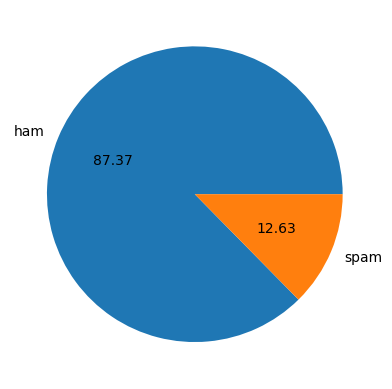

In [628]:
plt.pie(df['target'].value_counts() , labels=['ham' ,'spam'] , autopct='%0.2f')
plt.show()

In [630]:
import nltk

In [632]:
!pip install nltk

In [633]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pramo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [634]:
df['Num_characters']=df['text'].apply(len)

C:\Users\pramo\AppData\Local\Temp\ipykernel_15964\849239086.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Num_characters']=df['text'].apply(len)


In [635]:
df

,target,text,Num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [636]:
df['num_words'] = df['text'].apply(lambda x :len(nltk.word_tokenize(x)))

C:\Users\pramo\AppData\Local\Temp\ipykernel_15964\3480574913.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words'] = df['text'].apply(lambda x :len(nltk.word_tokenize(x)))


In [637]:
df['num_sen']=df['text'].apply(lambda x :len(nltk.sent_tokenize(x)))

C:\Users\pramo\AppData\Local\Temp\ipykernel_15964\1357008187.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sen']=df['text'].apply(lambda x :len(nltk.sent_tokenize(x)))


In [638]:
df[['Num_characters','num_words','num_sen']].describe()

,Num_characters,num_words,num_sen
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [639]:
df[df['target']== 0][['Num_characters','num_words','num_sen']].describe()

,Num_characters,num_words,num_sen
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [640]:
df[df['target']== 1][['Num_characters','num_words','num_sen']].describe()

,Num_characters,num_words,num_sen
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [641]:
import seaborn as se

<function matplotlib.pyplot.show(close=None, block=None)>

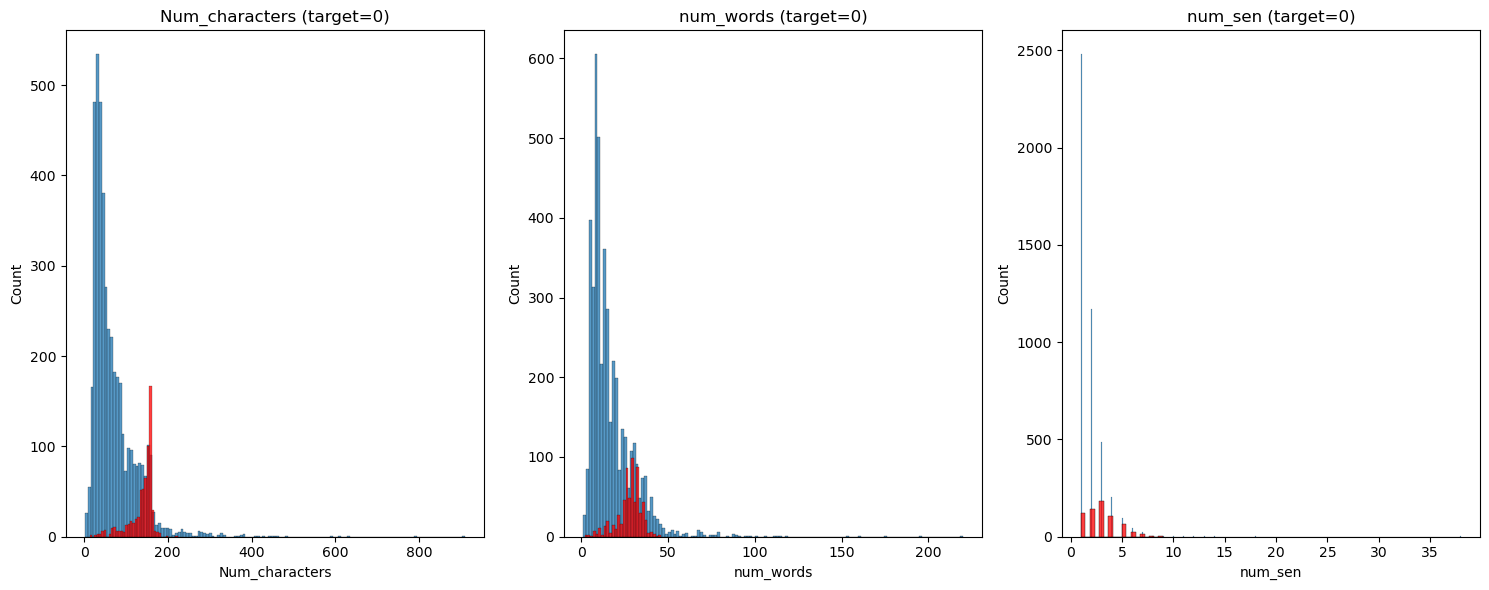

In [642]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 3, 1)  # (1 row, 3 columns, plot 1)
se.histplot(df[df['target'] == 0]['Num_characters'])
se.histplot(df[df['target'] == 1]['Num_characters'],color='red')
plt.title("Num_characters (target=0)")

plt.subplot(1, 3, 2)  # (1 row, 3 columns, plot 2)
se.histplot(df[df['target'] == 0]['num_words'])
se.histplot(df[df['target'] == 1]['num_words'],color='red')
plt.title("num_words (target=0)")

plt.subplot(1, 3, 3)  # (1 row, 3 columns, plot 3)
se.histplot(df[df['target'] == 0]['num_sen'])
se.histplot(df[df['target'] == 1]['num_sen'],color='red')
plt.title("num_sen (target=0)")

plt.tight_layout()
plt.show

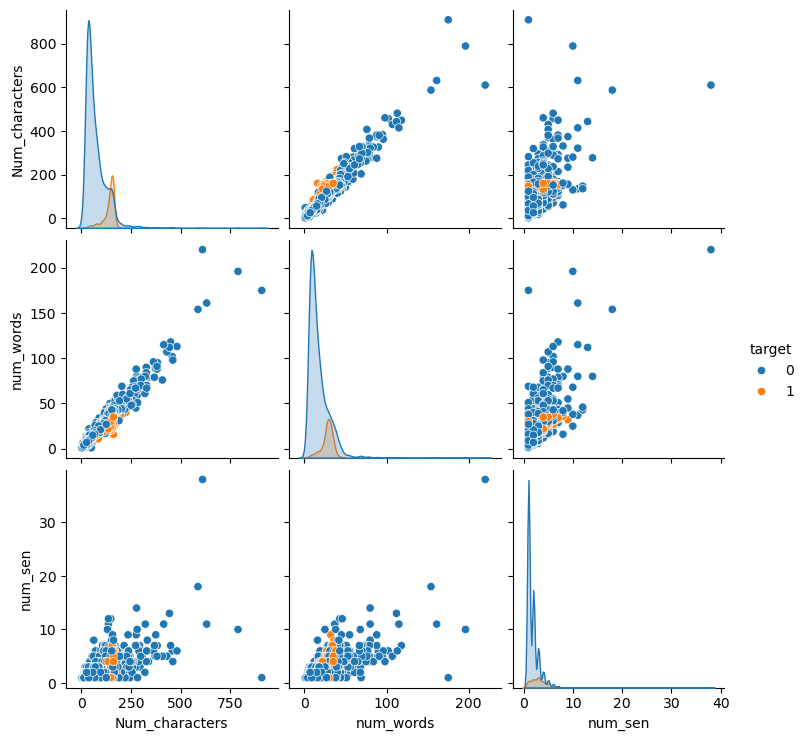

In [654]:
se.pairplot(df,hue='target')

In [655]:
df_corr = df.drop( columns='text')

<Axes: >

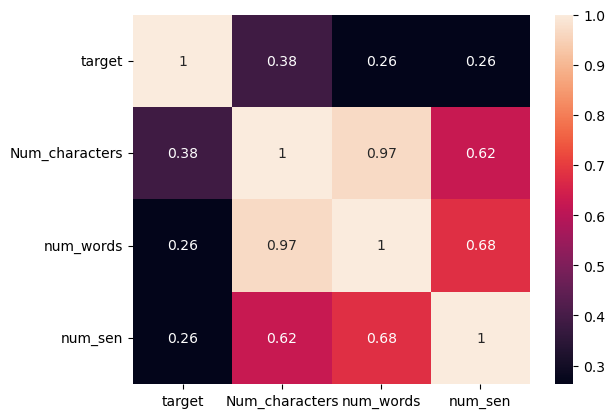

In [656]:
se.heatmap(df_corr.corr(),annot=True)

## Text preprocessing
#### 1 ) Lower Case 
#### 2 ) Tokeniztion
#### 3 ) Removing special characters
#### 4 ) Removing stop words and punctuation 
#### 5 ) Stemming

In [661]:
nltk.download('stopwords')
import string
from nltk.stem.porter import PorterStemmer
st = PorterStemmer()
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pramo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [663]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(st.stem(i))
    
    return " ".join(y)

In [665]:
df['transformed'] = df['text'].apply(transform_text)

C:\Users\pramo\AppData\Local\Temp\ipykernel_15964\2745157866.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed'] = df['text'].apply(transform_text)


In [666]:
df

,target,text,Num_characters,num_words,num_sen,transformed
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


In [669]:
from wordcloud import WordCloud
wc = WordCloud(width=1000,height=1000,background_color='white',min_font_size=10 )


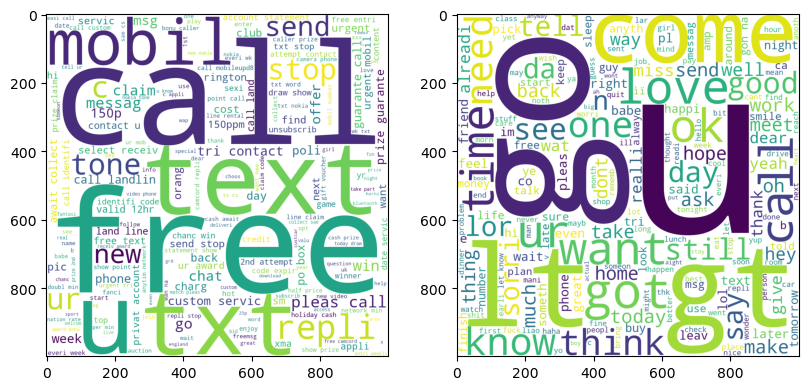

In [671]:
plt.figure(figsize=(15, 10))

plt.subplot(1, 3, 1) 
spam_wc = wc.generate(df[df['target'] == 1]['transformed'].str.cat(sep=" "))
plt.imshow(spam_wc)

plt.subplot(1, 3, 2) 
ham_wc = wc.generate(df[df['target'] == 0]['transformed'].str.cat(sep=" "))
plt.imshow(ham_wc)

In [672]:
df.head()

,target,text,Num_characters,num_words,num_sen,transformed
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [675]:
spam_words = []
ham_word = []
for mes in df[df['target'] == 1]['transformed'].tolist():
    for word in mes.split():
        spam_words.append(word)

for mes in df[df['target'] == 0]['transformed'].tolist():
    for word in mes.split():
        ham_word.append(word)

In [677]:
spam_words

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

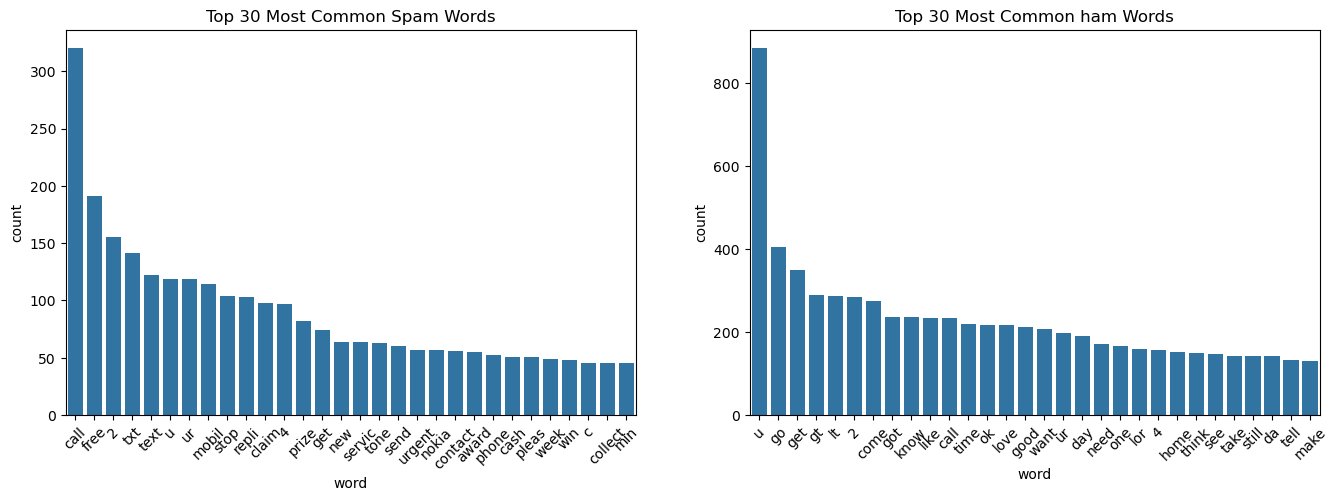

In [679]:
from collections import Counter
spam_word_counts = pd.DataFrame(Counter(spam_words).most_common(30), columns=['word', 'count'])
ham_word_counts = pd.DataFrame(Counter(ham_word).most_common(30), columns=['word', 'count'])

# Plot the barplot
plt.figure(figsize=(25, 5))

plt.subplot(1, 3, 1)
se.barplot(x='word', y='count', data=spam_word_counts)
plt.xticks(rotation=45)  # Rotate x labels if needed
plt.title("Top 30 Most Common Spam Words")


plt.subplot(1, 3, 2)
se.barplot(x='word', y='count', data=ham_word_counts)
plt.xticks(rotation=45)  # Rotate x labels if needed
plt.title("Top 30 Most Common ham Words")
plt.show()

## Model building

In [681]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tf = TfidfVectorizer()
# x = cv.fit_transform(df['transformed']).toarray()
x = tf.fit_transform(df['transformed']).toarray()
y = df['target'].values

In [494]:
from sklearn.model_selection import train_test_split
x_train ,x_test , y_train , y_test = train_test_split(x,y,random_state=42,test_size=0.2)

In [496]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [498]:
y_train

array([0, 0, 0, ..., 0, 0, 1])

In [500]:
y_test

array([0, 0, 0, ..., 1, 0, 0])

In [502]:
x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [504]:
from sklearn.naive_bayes import MultinomialNB,BernoulliNB,GaussianNB
mul = MultinomialNB()
gau = GaussianNB()
ber = BernoulliNB()
from sklearn.metrics import accuracy_score ,confusion_matrix ,precision_score

In [506]:
mul.fit(x_train,y_train)
pred1 = mul.predict(x_test)
print(accuracy_score(y_test,pred1))
print(confusion_matrix(y_test,pred1))
print(precision_score(y_test , pred1))

0.9613152804642167
[[888   1]
 [ 39 106]]
0.9906542056074766


In [470]:
gau.fit(x_train,y_train)
pred2 = gau.predict(x_test)
print(accuracy_score(y_test,pred2))
print(confusion_matrix(y_test,pred2))
print(precision_score(y_test , pred2))

0.8636363636363636
[[772 117]
 [ 24 121]]
0.5084033613445378


In [438]:
ber.fit(x_train,y_train)
pred3 = ber.predict(x_test)
print(accuracy_score(y_test,pred3))
print(confusion_matrix(y_test,pred1))
print(precision_score(y_test , pred1))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


## TfidfVectorizer -- > MultinomialNB

## Evaluation and Improvement

In [718]:
!pip install --upgrade scikit-learn
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
tf = TfidfVectorizer(max_features=3000)

  Using cached scikit_learn-1.5.2-cp312-cp312-win_amd64.whl.metadata (13 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.5.2-cp312-cp312-win_amd64.whl (11.0 MB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)
  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 2.2.0
    Uninstalling threadpoolctl-2.2.0:
      Successfully uninstalled threadpoolctl-2.2.0
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.1
    Uninstalling joblib-1.1.1:
      Successfully uninstalled joblib-1.1.1
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.4.2
    Uninstalling scikit-learn-1.4.2:
      Successfully uninstalled scikit-learn-1.4.2


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires joblib~=1.1.0, but you have joblib 1.4.2 which is incompatible.
pandas-profiling 3.2.0 requires visions[type_image_path]==0.7.4, but you have visions 0.7.6 which is incompatible.


In [719]:
x = tf.fit_transform(df['transformed']).toarray()

# from sklearn.preprocessing import MinMaxScaler
# m= MinMaxScaler()
# x= m.fit_transform(x)
y = df['target'].values

In [720]:
from sklearn.model_selection import train_test_split
x_train ,x_test , y_train , y_test = train_test_split(x,y,random_state=42,test_size=0.2)

In [721]:
from sklearn.naive_bayes import MultinomialNB,BernoulliNB,GaussianNB
mul = MultinomialNB()
from sklearn.metrics import accuracy_score ,confusion_matrix ,precision_score

In [722]:
mul.fit(x_train,y_train)
pred1 = mul.predict(x_test)
print(accuracy_score(y_test,pred1))
print(confusion_matrix(y_test,pred1))
print(precision_score(y_test , pred1))

0.9729206963249516
[[888   1]
 [ 27 118]]
0.9915966386554622


## website

In [724]:
import pickle
pickle.dump(tf,open('vectorizer2.pkl','wb'))
pickle.dump(mul,open('model2.pkl','wb'))